In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Hours and Scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
x=df.iloc[:,:-1]
x.ndim

2

In [ ]:
y=df.iloc[:,-1]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

Text(0.5, 1.0, 'Student Score based on Hours Graph')

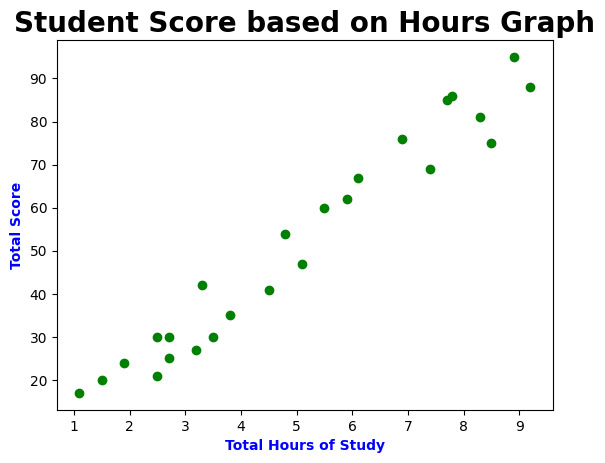

In [ ]:
plt.scatter(x,y,color='g')
plt.xlabel('Total Hours of Study',fontweight='bold',color='b')
plt.ylabel('Total Score',fontweight='bold',color='b')
plt.title('Student Score based on Hours Graph',fontsize=20,fontweight='bold',color='k')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9
21,4.8


In [ ]:
#MODEL CREATION
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

Text(0.5, 1.0, 'Student Score based on Hours Graph')

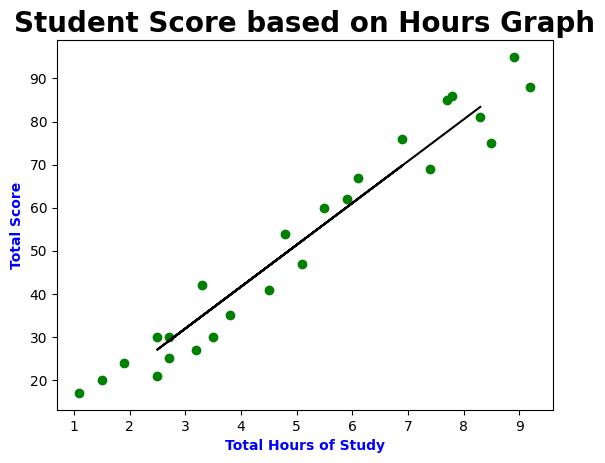

In [ ]:
plt.plot(x_test,y_pred,color='k')
plt.scatter(x,y,color='g')
plt.xlabel('Total Hours of Study',fontweight='bold',color='b')
plt.ylabel('Total Score',fontweight='bold',color='b')
plt.title('Student Score based on Hours Graph',fontsize=20,fontweight='bold',color='k')

In [ ]:
print(model.predict([[4.7]]))

[48.43373908]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Dataframe -actual value,predicted value,difference
import pandas as pd
# df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred},reset_index=True)
# df1
# # import pandas as pd

df1 = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})
df1 = df1.reset_index(drop=True)  # Reset index without creating a new column for the old index
df1

,Actual Value,Predicted Value,Difference
0,81,83.391686,-2.391686
1,30,27.070549,2.929451
2,21,27.070549,-6.070549
3,76,69.796929,6.203071
4,62,60.086388,1.913612
5,25,29.012657,-4.012657
6,42,34.838982,7.161018
7,47,52.317955,-5.317955


In [ ]:
#y=mx+c
print('Slope is',model.coef_)  #slope

Slope is [9.71054094]


In [ ]:
print('Constant is',model.intercept_)

Constant is 2.794196676599803


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Error is: ',mean_absolute_error(y_test,y_pred))

Error is:  4.499999999999998


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('Error is: ',mean_absolute_percentage_error(y_test,y_pred)*100,'%')
#max value of MAPE is 0.3 for a good model.

Error is:  12.161098657057002 %


In [ ]:
from sklearn.metrics import mean_squared_error
print('Error is: ',mean_squared_error(y_test,y_pred))

Error is:  23.61945761415174


In [ ]:
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
RMSE

4.859985351228103

In [ ]:
from sklearn.metrics import r2_score
print('R2 Score is: ',r2_score(y_test,y_pred)*100,'%')

R2 Score is:  94.87647340257011 %
